In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


all the jobs crashed because of [this issue](https://github.com/scikit-learn/scikit-learn/issues/3048) 

Modified MiniBatchKMeans so that it doesn't compute label upfront but does it in the fit and predict procedure, this avoids the dot product matrix multiplication of the two large arrays (which is what caused the memory used to spike and crash). The initialization procedures has all been set to the default values . 

In [2]:
import glob

In [3]:
k_range = []
for i in glob.glob("minibatch_kmeans2/data_output/density*.txt"): 
    k_range.append(int(i.split(".")[0][37:])) 
k_range=sort(k_range)
print k_range

[  100  1100  2100  3100  4100  5100  6100  7100  8100  9100 10100 11100
 12100 13100 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000
 25000 26000 30000]


//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


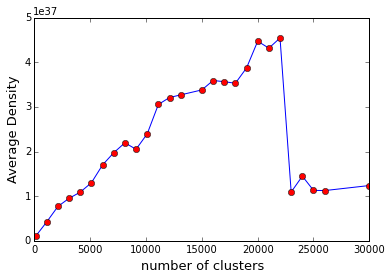

In [4]:
import os
import glob
avrg_densities=[]
# k_range1=np.arange(100,14100,1000)
# k_range2=np.arange(15000,19000,1000)
# k_range = np.concatenate([k_range1,k_range2],axis=0)
for n in k_range:
    avrg_densities.append(mean(np.loadtxt("minibatch_kmeans2/data_output/density{}.txt".format(n))))
plt.plot(k_range,avrg_densities)
plt.plot(k_range,avrg_densities,'o',color = 'red')
plt.xlabel("number of clusters",fontsize=13)
plt.ylabel("Average Density",fontsize=13)
plt
plt.legend(loc='upper left',prop={'size':12},numpoints=1)

In [10]:
k_range_with_time=[]
kmeans_time = []
for i in glob.glob("minibatch_kmeans2/pbs_output/*.out"):
    with open(i, 'r+') as f:
        lines = f.readlines()
        for i in range(0, len(lines)):
#             if lines[i][14:]=="test": #cluster number 
#             if str(lines[i][14:18])=="test":
#                 k_range_with_time.append(float(lines[i][:5]))
            if lines[i][:4]=="Time":
                kmeans_time.append(float(lines[i][5:]))
print kmeans_time
print k_range_with_time

[19263.6186988, 37.4935061932, 367.104830027, 434.081164837, 258.846617937, 362.911755085, 499.696087837, 661.776847124, 859.067950964, 1090.79213095, 1409.54032397, 1667.88138986, 1993.10591507, 2334.87623596, 2708.63842583, 3505.32119513, 3954.84374094, 4413.36469889, 4934.33758497, 5502.97708607, 6071.39250088, 6698.21938515, 5654.80801511, 5849.47794914, 6109.92756104, 6272.26248097, 7186.92269087]
[]


It was dumb to try to scale to 10M the whole data set is only 2097152 (2M)

In [84]:
centers = loadtxt("minibatch_kmeans2/data_output/centers22000.txt")
density = loadtxt("minibatch_kmeans2/data_output/density22000.txt")

In [85]:
shape(density)

(21940,)

In [86]:
min(density)

7.7375187616159958e+32

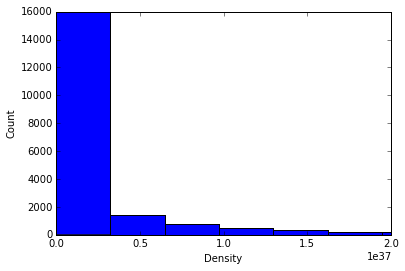

In [87]:
plt.hist(density,bins=10000)
plt.xlabel("Density")
plt.ylabel("Count")
plt.xlim(0,0.2e38)
plt.show()

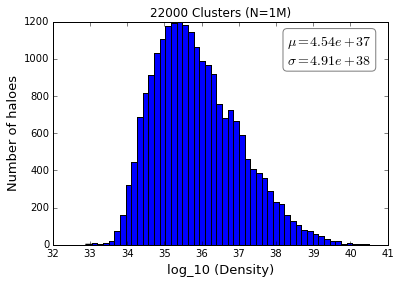

In [124]:
fig, ax = plt.subplots(1)
x = log10(density)
mu = mean(density)
sigma = np.std(density)
textstr = '$\mu=%.2e$\n$\sigma=%.2e$'%(mu,sigma)
ax.hist(x, 50)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.7, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.xlabel("log_10 (Density)",fontsize=13)
plt.ylabel("Number of haloes",fontsize=13)
plt.title("22000 Clusters (N=1M)")

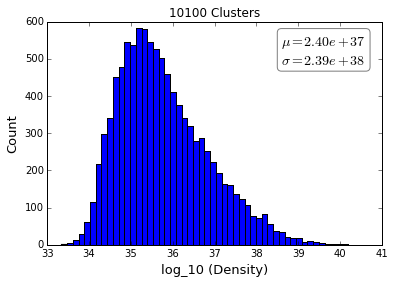

In [89]:
# centers = loadtxt("minibatch_kmeans2/data_output/centers10100.txt")
density = loadtxt("minibatch_kmeans2/data_output/density10100.txt")
# labels = loadtxt("minibatch_kmeans2/data_output/labels10100.txt")
fig, ax = plt.subplots(1)
x = log10(density)
mu = mean(density)
sigma = np.std(density)
textstr = '$\mu=%.2e$\n$\sigma=%.2e$'%(mu,sigma)
ax.hist(x, 50)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.7, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.xlabel("log_10 (Density)",fontsize=13)
plt.ylabel("Count",fontsize=13)
plt.title("10100 Clusters")

if ~40 is the ideal cluster if I want to try this on 1M then I only need to test the range near that so the peak for 10M should be at 250000, and so an appropriate range to test for is: 

In [15]:
np.arange(200000,310000,10000)

array([200000, 210000, 220000, 230000, 240000, 250000, 260000, 270000,
       280000, 290000, 300000])

Normalized by the mass (mass is constant) to get number of particles per halo (which is more intuitive )

In [95]:
# density = loadtxt("minibatch_kmeans2/data_output/density22000.txt")
# fig, ax = plt.subplots(1)
# # x = log10(density)
# particle_mass = 2.75491975e43
# N = density/particle_mass
# mu = mean(N)
# sigma = np.std(N)
# textstr = '$\mu=%.2e$\n$\sigma=%.2e$'%(mu,sigma)
# ax.hist(N, 50)
# props = dict(boxstyle='round', facecolor='white', alpha=0.5)
# ax.text(0.7, 0.95, textstr, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)
# plt.xlabel("Number of particles",fontsize=13)
# plt.ylabel("Number of haloes",fontsize=13)
# plt.title("22000 Clusters")

No you can't just divide you are forgetting volume '

In [98]:
labels = loadtxt("minibatch_kmeans2/data_output/labels22000.txt")

In [104]:
n_clusters = len(np.unique(labels)) # total number of unique clusters 

In [105]:
N_list = []
for i in np.arange(n_clusters):
    N_list.append(len(np.where(labels==i)[0]))

(0, 400)

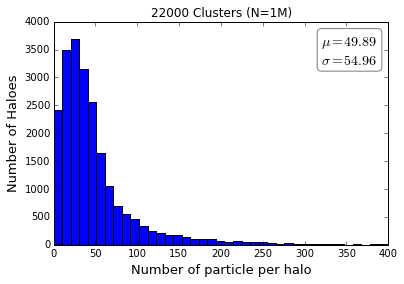

In [122]:
fig, ax = plt.subplots(1)
mu = mean(N_list)
sigma = np.std(N_list)
textstr = '$\mu=%.2f$\n$\sigma=%.2f$'%(mu,sigma)
hist = ax.hist(N_list, 70)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.8, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.xlabel("Number of particle per halo",fontsize=13)
plt.ylabel("Number of Haloes",fontsize=13)
plt.title("22000 Clusters (N=1M)")
plt.xlim(0,400)

In [ ]:
N_list = []
for i in np.arange
N=len(np.where(labels==i)[0])

In [100]:
shape(labels)

(1097152,)

In [121]:
# cat 10MMBK/mbk.py

Can not submit this on cori because the 10hr job I just ran exceeded walltime which means that the 2M sample takes a long time to run 

http://www.nersc.gov/users/computational-systems/cori/running-jobs/queues-and-policies/

Cori regular queues only allow max walltime of 12 hrs 